## **Next-Generation Agricultural Market Forecasting and Insights System for Kenya**

### Business Understanding
### Business Overview

Kenya’s economic stability is intrinsically linked to the performance of its agricultural sector, which serves as both a primary GDP contributor and the backbone of livelihoods for millions of households. However, the sector continues to face structural inefficiencies characterized by persistent price volatility, fragmented market coordination, information asymmetry, and sentiment-driven demand fluctuations. These systemic challenges erode income predictability for farmers and traders, constrain value chain optimization, and ultimately weaken overall market resilience. In a data-driven global economy, the absence of real-time market intelligence and forward-looking analytics represents a critical strategic gap. Addressing this gap through an integrated, predictive market insights and forecasting system presents a transformative opportunity to enhance transparency, stabilize incomes, strengthen decision-making, and drive sustainable economic impact across Kenya’s agricultural ecosystem.
Stakeholders and Their Gains
Farmers (Small-Scale & Large-Scale)
Gains:
Informed decisions on when and where to sell their produce for maximum profit.
Insights into seasonal price trends to optimize crop production cycles.
Awareness of public sentiment that may impact market demand.


### Traders & Distributors (Wholesalers & Retailers)
#### Gains:
Forecasting tools to plan optimal buying and selling times.
Reduction in losses due to unexpected price drops.
Better logistics planning by analyzing regional price variations.

### Consumers (General Public)
#### Gains:
Awareness of expected price changes for household budgeting.
More stable prices due to better market efficiency.
Potential for lower food costs as market inefficiencies decrease.

### Problem Statement
Kenya’s agricultural markets exhibit pronounced price volatility across regions and commodity categories, creating significant uncertainty for market participants. These fluctuations are driven by seasonal production cycles, shifting demand patterns, regional supply imbalances, and evolving public perception. For example, staple commodities such as maize experience substantial temporal and geographic price disparities, directly influencing farmers’ commercialization strategies and revenue outcomes. Compounding these structural inefficiencies is the growing influence of digital public sentiment, particularly on social media platforms, which increasingly shapes market expectations and short-term demand behavior. The convergence of these factors results in a complex and opaque decision-making environment, limiting stakeholders’ ability to optimize pricing, distribution, and market timing strategies.

### Objectives
### Assess Commodity Price Fluctuations
* Evaluate the price volatility of various commodities across different regions and time periods
* Identify the factors contributing to price fluctuations, such as seasonal variations, market demand e.t.c.
### Analyze Market Trends:
* Monitor market trends and patterns in commodity prices using historical data and advanced analytics.
* Develop predictive models to forecast future market trends and price movements.


**DATA UNDERSTANDING**

The primary dataset contains Food Prices data for Kenya, sourced from the Kenya Agricultural Market Information System KAMIS, developed by the Ministry of Agriculture, Livestock, Fisheries, and Cooperatives. This database covers foods such as maize, rice, beans and beef, ,is updated daily(though mostly contains monthly data). The platform offers data on commodity prices, trade volumes, and market highlights

***Understanding rows and columns of our data***

In [24]:
#importing necessary libraries
import pandas as pd
import glob
import os
import warnings
import time
import sys
import matplotlib.pyplot as plt
import seaborn as sns
# importing custom scripts for different functions
sys.path.append('scripts')  # add scripts to path




# Ignore warnings
warnings.filterwarnings("ignore")

In [25]:
# Setting the directory containing our CSV files
csv_directory = ".\\data\\Products"  

# Use glob to match all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))

# Initialize an empty list to hold DataFrames
data_frames = []

# Iterate over the list of CSV files
for file in csv_files:
    # Read each CSV file into a DataFrame
    df = pd.read_csv(file)
    # Append the DataFrame to the list
    data_frames.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# printing part of the combined dataframe
combined_df

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Banana (Ripening),-,-,-,Mukuyu Market,-,50.00/Kg,NaN,Muranga,2026-02-11
1,Banana (Ripening),-,-,-,Mulot,70.00/Kg,100.00/Kg,1500.0,Bomet,2026-02-11
2,Banana (Ripening),-,-,-,Kitale Municipality Market,80.00/Kg,100.00/Kg,6000.0,Trans-Nzoia,2026-02-11
3,Banana (Ripening),-,-,-,Kerugoya,20.00/Kg,40.00/Kg,300.0,Kirinyaga,2026-02-10
4,Banana (Ripening),-,-,-,Bondeni,80.00/Kg,100.00/Kg,5000.0,Trans-Nzoia,2026-02-10
...,...,...,...,...,...,...,...,...,...,...
57005,Beans (Yellow-Green),-,-,-,Molo,-,250.00/Kg,40.0,Nakuru,2024-02-01
57006,Beans (Yellow-Green),-,-,-,Nyeri open air,155.56/Kg,180.00/Kg,NaN,Nyeri,2024-01-31
57007,Beans (Yellow-Green),-,-,-,Makutano Kirinyaga,116.67/Kg,130.00/Kg,1600.0,Kirinyaga,2024-01-31
57008,Beans (Yellow-Green),-,-,-,Nakuru Wakulima,140.00/Kg,-,NaN,Nakuru,2024-01-31


In [26]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57010 entries, 0 to 57009
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Commodity       57010 non-null  object 
 1   Classification  57010 non-null  object 
 2   Grade           57010 non-null  object 
 3   Sex             57010 non-null  object 
 4   Market          57010 non-null  object 
 5   Wholesale       57010 non-null  object 
 6   Retail          57010 non-null  object 
 7   Supply Volume   39235 non-null  float64
 8   County          56991 non-null  object 
 9   Date            57010 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.3+ MB


In [27]:
combined_df.to_csv("combined.csv", index=False)

In [28]:
combined_df.isna().sum()

Commodity             0
Classification        0
Grade                 0
Sex                   0
Market                0
Wholesale             0
Retail                0
Supply Volume     17775
County               19
Date                  0
dtype: int64

In [29]:
combined_df.drop(columns=['Supply Volume'], axis=1, inplace=True)

In [30]:
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df.head()

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,County,Date
0,Banana (Ripening),-,-,-,Mukuyu Market,-,50.00/Kg,Muranga,2026-02-11
1,Banana (Ripening),-,-,-,Mulot,70.00/Kg,100.00/Kg,Bomet,2026-02-11
2,Banana (Ripening),-,-,-,Kitale Municipality Market,80.00/Kg,100.00/Kg,Trans-Nzoia,2026-02-11
3,Banana (Ripening),-,-,-,Kerugoya,20.00/Kg,40.00/Kg,Kirinyaga,2026-02-10
4,Banana (Ripening),-,-,-,Bondeni,80.00/Kg,100.00/Kg,Trans-Nzoia,2026-02-10


In [31]:
data=combined_df.drop(columns=['Classification', 'Grade', 'Sex', 'Market'], axis=1)

In [32]:
for col in ['Retail', 'Wholesale']:
    data[col] = (
        data[col]
        .astype(str)
        .str.replace('/Kg', '', regex=False)
        .str.replace('-', '', regex=False)
        .str.strip()
    )


In [33]:
for col in ['Retail', 'Wholesale']:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57010 entries, 0 to 57009
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Commodity  57010 non-null  object        
 1   Wholesale  45298 non-null  float64       
 2   Retail     54612 non-null  float64       
 3   County     56991 non-null  object        
 4   Date       57010 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.2+ MB


In [34]:
# Aggregate
df_monthly = (
    data
    .groupby(['County', 'Commodity', pd.Grouper(key='Date', freq='MS')])
    .agg({'Retail': 'mean',
          'Wholesale': 'mean'})
    .reset_index()
)
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6355 entries, 0 to 6354
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   County     6355 non-null   object        
 1   Commodity  6355 non-null   object        
 2   Date       6355 non-null   datetime64[ns]
 3   Retail     6302 non-null   float64       
 4   Wholesale  5731 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 248.4+ KB


In [35]:
def enforce_monthly_index(group):
    idx = pd.date_range(
        start=group['Date'].min(),
        end=group['Date'].max(),
        freq='MS'
    )
    group = (
        group
        .set_index('Date')
        .reindex(idx)
    )
    group['County'] = group['County'].iloc[0]
    group['Commodity'] = group['Commodity'].iloc[0]
    return group.reset_index().rename(columns={'index': 'Date'})


In [36]:
df_complete = (
    df_monthly
    .groupby(['County', 'Commodity'], group_keys=False)
    .apply(enforce_monthly_index)
)
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9189 entries, 0 to 0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9189 non-null   datetime64[ns]
 1   County     9189 non-null   object        
 2   Commodity  9189 non-null   object        
 3   Retail     6302 non-null   float64       
 4   Wholesale  5731 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 430.7+ KB


In [37]:
df_complete=df_complete.set_index('Date')
df_complete = df_complete.sort_index()
df_complete[['Retail', 'Wholesale']] = (
    df_complete
    .groupby(['County', 'Commodity'])[['Retail', 'Wholesale']]
    .apply(lambda x: x.interpolate(method='time'))
)

In [38]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9189 entries, 2022-02-01 to 2026-02-01
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   County     9189 non-null   object 
 1   Commodity  9189 non-null   object 
 2   Retail     9172 non-null   float64
 3   Wholesale  8969 non-null   float64
dtypes: float64(2), object(2)
memory usage: 678.9+ KB


In [39]:
df_complete

,County,Commodity,Retail,Wholesale
Date,,,,
2022-02-01,Nyandarua,Wheat,56.000000,48.0000
2022-02-01,Kisii,Wheat,80.000000,60.0000
2022-02-01,Uasin-Gishu,Wheat,80.000000,50.0000
2022-02-01,Trans-Nzoia,Wheat,75.000000,58.8900
2022-02-01,Kirinyaga,Wheat,66.666667,57.5000
...,...,...,...,...
2026-02-01,Trans-Nzoia,Beans (Yellow-Green),61.332500,49.0825
2026-02-01,Meru,Wheat,90.000000,75.0000
2026-02-01,Kirinyaga,Meat Beef,158.300000,137.0000


In [40]:
df_complete.isnull().sum()

County         0
Commodity      0
Retail        17
Wholesale    220
dtype: int64

In [41]:
# filling gaps within each group
df_complete[['Retail', 'Wholesale']] = (df_complete.groupby(['County', 'Commodity'])[['Retail', 'Wholesale']].ffill().bfill()) 
# ffill Carries the last known price forward # bfill Carries the next known price backward for gaps at the start


In [42]:
print(df_complete.isnull().sum())

County       0
Commodity    0
Retail       0
Wholesale    0
dtype: int64


What is Wheat Price trend in Nairobi?

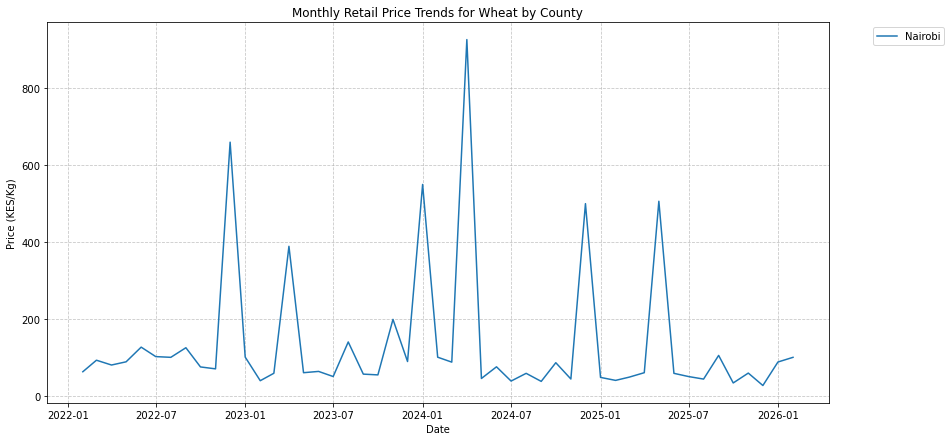

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering for a specific commodity to analyze trends
commodity_name = 'Wheat'
Nairobi_data = df_complete[(df_complete['Commodity'] == commodity_name) & (df_complete['County'] == 'Nairobi')]
plt.figure(figsize=(14, 7))
sns.lineplot(data=Nairobi_data, x=Nairobi_data.index, y='Retail', hue='County')
plt.title(f'Monthly Retail Price Trends for {commodity_name} by County')
plt.xlabel('Date')
plt.ylabel('Price (KES/Kg)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

What is the price distribution across different commodities in Kenya?

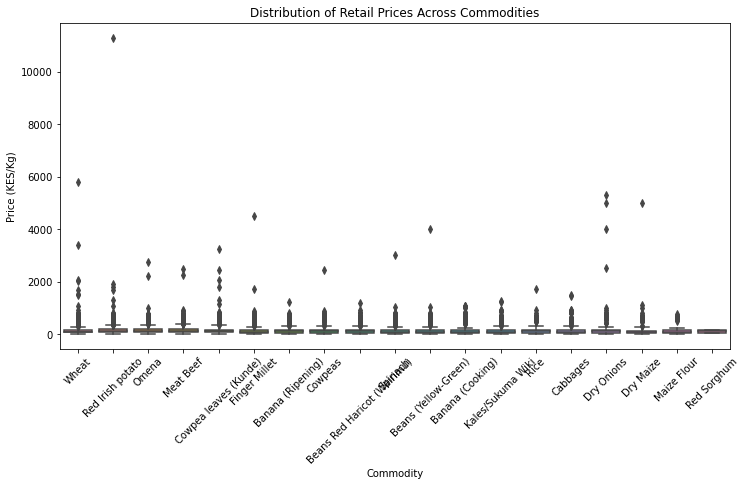

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_complete, x='Commodity', y='Retail')
plt.xticks(rotation=45)
plt.title('Distribution of Retail Prices Across Commodities')
plt.ylabel('Price (KES/Kg)')
plt.show()

What is the Wholesale to retail Margin by commodity in Kenya?

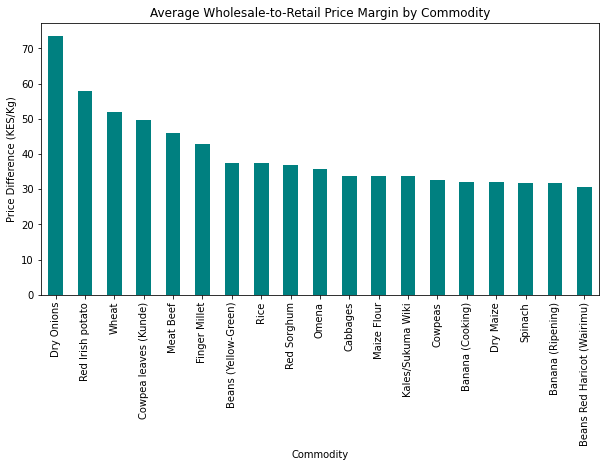

In [57]:
# Calculate the margin
df_complete['Margin'] = df_complete['Retail'] - df_complete['Wholesale']

# Plot the average margin per commodity
avg_margin = df_complete.groupby('Commodity')['Margin'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
avg_margin.plot(kind='bar', color='teal')
plt.title('Average Wholesale-to-Retail Price Margin by Commodity')
plt.ylabel('Price Difference (KES/Kg)')
plt.show()